In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
# Read the csv and perform basic data cleaning
bean_df = pd.read_csv("Resources/Dry_Bean_Dataset.csv")
# Drop the null columns where all values are null
bean_df = bean_df.dropna(axis='columns', how='all')
# Drop the null rows
bean_df = bean_df.dropna()
bean_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [15]:
# Identify labels (y-value)
y = bean_df["Class"]
# target


# Drop the y-label to use for the test
X = bean_df.drop("Class", axis=1)
feature_names = X.columns
# X.head()
print(X.shape, y.shape)



(13611, 16) (13611,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [18]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.909
k: 3, Train/Test Score: 0.952/0.926
k: 5, Train/Test Score: 0.943/0.923
k: 7, Train/Test Score: 0.939/0.919
k: 9, Train/Test Score: 0.937/0.924
k: 11, Train/Test Score: 0.934/0.924
k: 13, Train/Test Score: 0.933/0.922
k: 15, Train/Test Score: 0.932/0.922
k: 17, Train/Test Score: 0.931/0.919
k: 19, Train/Test Score: 0.929/0.919


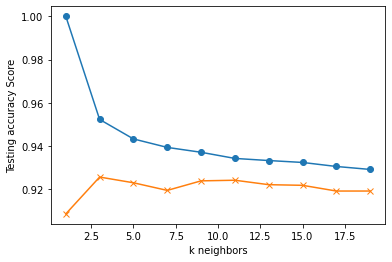

In [19]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
# Note that k: 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.922


In [34]:
# Make predictions
predictions = knn.predict(X_test_scaled)
print(f"First 10 Predictions  : {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")



First 10 Predictions  : ['SEKER', 'BARBUNYA', 'SEKER', 'SEKER', 'DERMASON', 'SEKER', 'CALI', 'SEKER', 'BOMBAY', 'DERMASON']
First 10 Actual labels: ['SEKER', 'BARBUNYA', 'SEKER', 'SEKER', 'DERMASON', 'SEKER', 'CALI', 'SEKER', 'BOMBAY', 'DERMASON']


Source: [Sklearn Nearest Neighbors](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html)

## Cross-Validation for Classification

How to deal with Cross-Validation based on KNN algorithm, Compute AUC based on Naive Bayes algorithm
Source:(https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4)


In [22]:
# In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples.
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [23]:
# print all 5 times scores 
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())
# 0.973333333333

[0.30040397 0.1800147  0.08706833 0.07714916 0.15944159]
0.1608155471002047


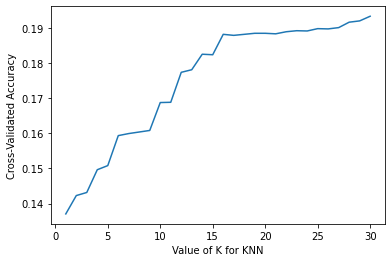

In [24]:
# we could choose differenct neighbors to see which K is the best K.

%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [32]:
# As we can see the best K is above 15, after 15 the accuracy tends to stablize..